Classification Problem
---

In [8]:
import numpy as np
import matplotlib.pyplot as plt

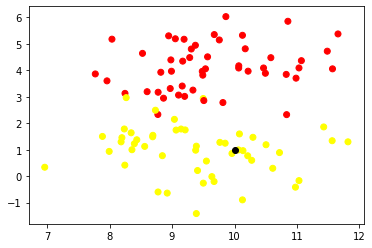

In [95]:
# start by loading a data

x = np.load("Datasets/Data/X.npy")
y = np.load("Datasets/Data/Y.npy")

_x = x[:,0]
_y = x[:,1]


# method to color using loop
for i in range(0,100):
    if y[i] == 0:
        _color = 'red'
    else:
        _color = 'green'
#     plt.scatter(_x[i],_y[i],color=_color )
# plt.show()


test_point = np.array([10,1])
# directly color according to data
plt.scatter(x[:,0],x[:,1],c=y, cmap=plt.cm.autumn_r)
plt.scatter(test_point[0],test_point[1], color="black")
plt.show()

# more about markers here : https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers

In [97]:
# mapping for classification
mapping = {
    0:"yellow",
    1:"red"
}

# function to calculate distance between two given points p1 and p2
def dist(p1,p2):
    return np.sum((p1-p2)**2)**0.5


# the classifier function
def KNN(X,Y,test_point, K=5):
    d = [] # will store distance 
    m = X.shape[0] # 100,2 -> total number of points
    
    #Step1 - find distance of testpoint from all points
    for i in range(0,m):
        current_dist = dist(test_point, X[i]) # find distance of testpoint from current point
        d.append((current_dist,Y[i])) # append distance along with pair into d
    
    #Step2 - sort all points according to distances
    d = sorted(d) # by default based on the first key of tupple
    
    #Step3 - Pick the first k points
    d = d[:K] # pick only the first k elements, can be varied
    
    #Step4 - Create a numpy array
    d = np.array(d) 
    d = d[:,1] # get all rows, but elements from only first column
    
    #Step5 - Find out unique classes and counts
    uniq, cnts = np.unique(d,return_counts=True) # uniq denotes (0 and 1) and cnts is array of individual instances 
    idx = np.argmax(cnts) # get the index of maximum element. the cnts variable contains two elements. one is zero and other is one. on the zeroth element, there are instances of one. on one it contains instances of one.
    
    #Step6 - Find the label with maximum count
    pred = uniq[idx] # now pred has 0 or 1 whichever is maximum
    
    #Step7 - Map and send data 
    return mapping[int(pred)] # replace 0 or 1 with respective mapping


#  last parameter will check the number of neighbours to compare
KNN(x,y,test_point,50)

'yellow'